In [1]:
%%html
<style>
.cell-output-ipywidget-background {
    background-color: transparent !important;
}
:root {
    --jp-widgets-color: var(--vscode-editor-foreground);
    --jp-widgets-font-size: var(--vscode-editor-font-size);
}  
</style>

In [2]:
import datetime
import pyaurorax

aurorax = pyaurorax.PyAuroraX()

In [3]:
# download an hour of REGO data
dataset_name = "REGO_RAW"
start_dt = datetime.datetime(2021, 11, 4, 3, 0)
end_dt = datetime.datetime(2021, 11, 4, 3, 59)
site_uid = "gill"
r = aurorax.data.ucalgary.download(dataset_name, start_dt, end_dt, site_uid=site_uid)

In [4]:
# read in the hour of data
data = aurorax.data.ucalgary.read(r.dataset, r.filenames, n_parallel=5)

In [5]:
# set up working with the tools by just making a shorter name for our future calls
at = aurorax.tools

In [6]:
# scale all the images
#
# NOTE: you can scale all images or just one image
images_scaled = at.scale_intensity(data.data, min=400, max=1100)

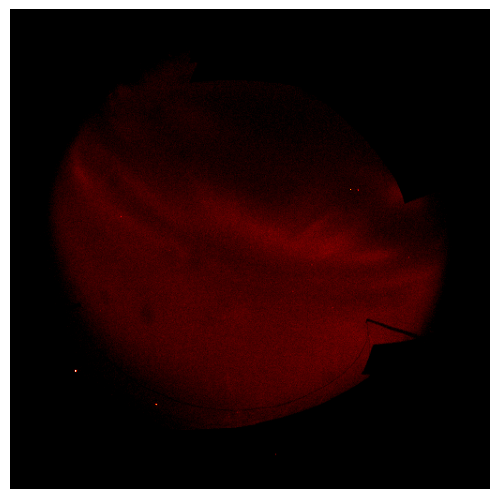

In [7]:
at.display(images_scaled[:, :, 0], cmap="gist_heat")

# Generate a keogram

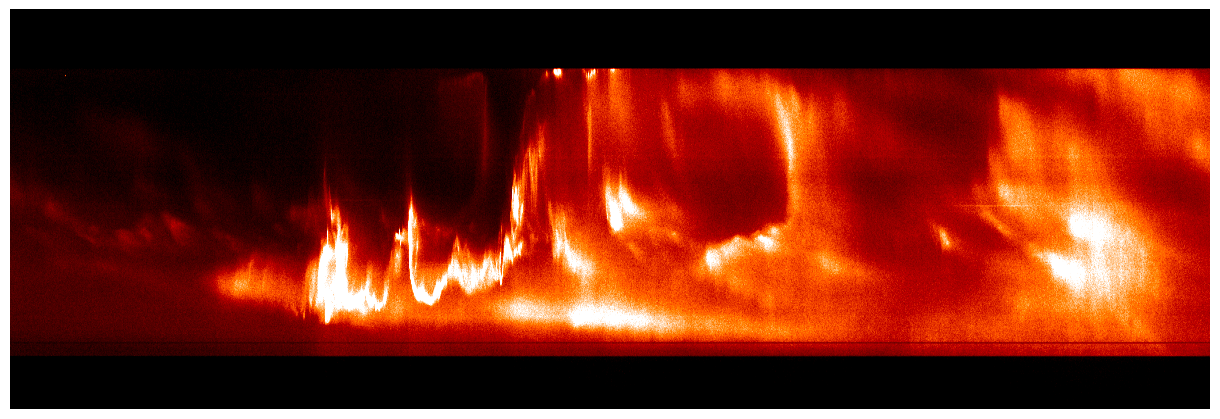

In [8]:
keogram = at.keogram.create(images_scaled, data.timestamp)
at.display(keogram.data, cmap="gist_heat", figsize=(12, 4), aspect="auto")

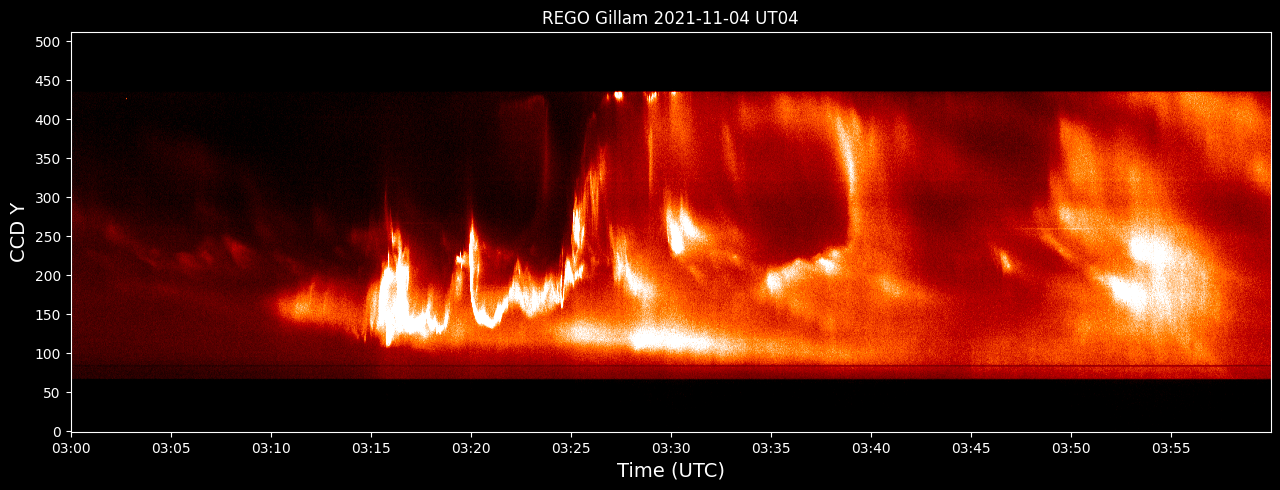

In [9]:
at.set_theme("dark")
plot_dt = start_dt  # need this timestamp for later plots, so we reassign it
keogram.plot(
    title="REGO Gillam %s" % (plot_dt.strftime("%Y-%m-%d UT%d")),
    figsize=(12, 4),
    cmap="gist_heat",
    aspect="auto",
)

# Reference in geographic coordinates

In [10]:
# download skymap files
start_dt = datetime.datetime(2020, 1, 1)
end_dt = datetime.datetime(2022, 1, 1)
r = aurorax.data.ucalgary.download("REGO_SKYMAP_IDLSAV", start_dt, end_dt, site_uid=site_uid, overwrite=True)
r.filenames

[PosixPath('/home/josh/pyaurorax_data/REGO_SKYMAP_IDLSAV/gill/gill_20200204/rego_skymap_gill_20200204-+_v01.sav'),
 PosixPath('/home/josh/pyaurorax_data/REGO_SKYMAP_IDLSAV/gill/gill_20200314/rego_skymap_gill_20200314-+_v01.sav'),
 PosixPath('/home/josh/pyaurorax_data/REGO_SKYMAP_IDLSAV/gill/gill_20200806/rego_skymap_gill_20200806-+_v01.sav'),
 PosixPath('/home/josh/pyaurorax_data/REGO_SKYMAP_IDLSAV/gill/gill_20210108/rego_skymap_gill_20210108-+_v01.sav'),
 PosixPath('/home/josh/pyaurorax_data/REGO_SKYMAP_IDLSAV/gill/gill_20210805/rego_skymap_gill_20210805-+_v01.sav'),
 PosixPath('/home/josh/pyaurorax_data/REGO_SKYMAP_IDLSAV/gill/gill_20211213/rego_skymap_gill_20211213-+_v01.sav')]

In [11]:
# we want to use the second last one, since that's for the time period of the data we're looking at
skymaps = aurorax.data.ucalgary.read(r.dataset, r.filenames[-2])
skymaps.data[0].pretty_print()

Skymap:
  filename               : /home/josh/pyaurorax_data/REGO_SKYMAP_IDLSAV/gill/gill_20210805/rego_skymap_gill_20210805-+_v01.sav
  full_azimuth           : array(dims=(512, 512), dtype=>f4)
  full_elevation         : array(dims=(512, 512), dtype=>f4)
  full_map_altitude      : array(dims=(3,), dtype=>f4)
  full_map_latitude      : array(dims=(3, 513, 513), dtype=>f4)
  full_map_longitude     : array(dims=(3, 513, 513), dtype=>f4)
  generation_info        : SkymapGenerationInfo(...)
  get_precalculated_altitudes: <bound method Skymap.get_precalculated_altitudes of Skymap(project_uid=rego, site_uid=gill, imager_uid=rego-652, site_map_latitude=56.376724, site_map_longitude=265.356323, ...)>
  imager_uid             : rego-652
  project_uid            : rego
  site_map_altitude      : 0.0
  site_map_latitude      : 56.376724
  site_map_longitude     : 265.35632
  site_uid               : gill
  version                : v01


In [12]:
keogram.set_geographic_latitudes(skymaps.data[0])

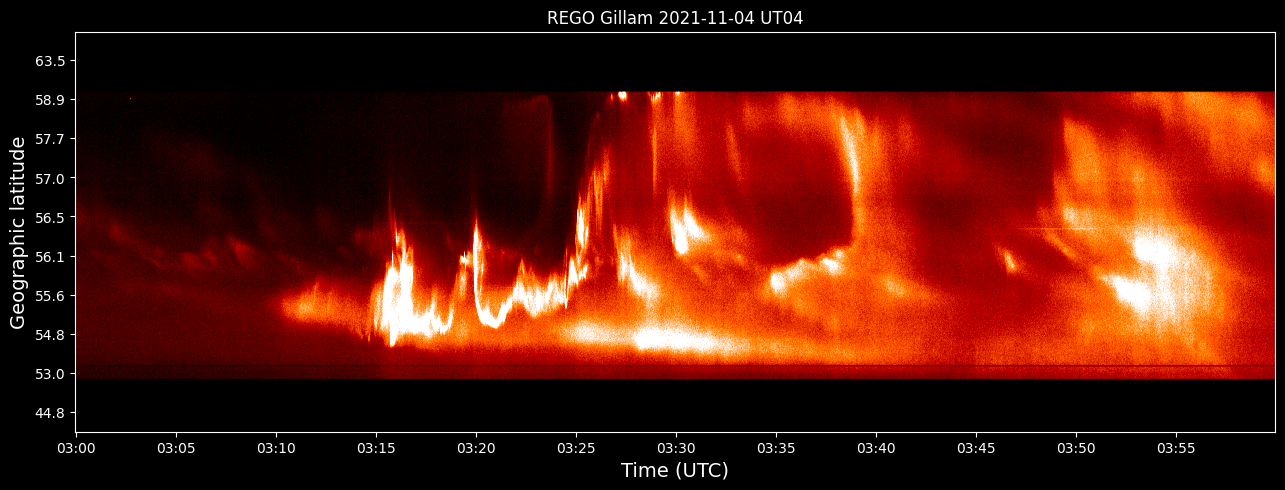

In [13]:
keogram.plot(
    figsize=(12, 4),
    cmap="gist_heat",
    y_type="geo",
    aspect="auto",
    title="REGO Gillam %s" % (plot_dt.strftime("%Y-%m-%d UT%d")),
)

In [14]:
keogram.set_magnetic_latitudes(skymaps.data[0], start_dt)

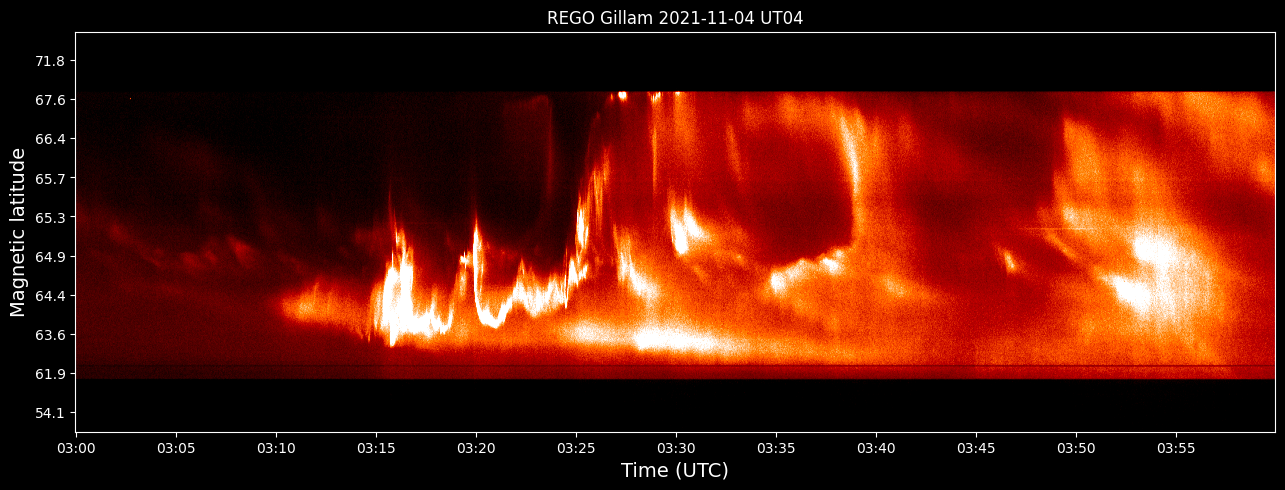

In [15]:
keogram.plot(
    figsize=(12, 4),
    cmap="gist_heat",
    y_type="mag",
    aspect="auto",
    title="REGO Gillam %s" % (plot_dt.strftime("%Y-%m-%d UT%d")),
)